#### Library imports

Chinese Restaurants in New York City

1. Introduction / Business Problem

This project examined how many restaurants found in New York City and how they distributed in the cities. As New York is a decidedly more significant city, the number of different venues scaled to the number of inhabitants and city area. The project can be of particular interest for tourists, considering which city they want to visit.

2. Data

In general, the Foursquare location data applied to solve the problem - the data stored in Pandas dataframes and the Folium package used to create plots of the two cities. The data of New York downloaded as a json file. The coordinates afterward loaded as a csv file. The Foursquare is applied to search for venues in the cities.



In [1]:
import pandas as pd
import numpy as np
import requests
# from bs4 import BeautifulSoup
import os
# !conda install -c conda-forge folium=0.5.0 --yes
!pip install folium
import folium 
!pip install geopy
# !conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

     |████████████████████████████████| 122kB 7.7MB/s eta 0:00:01


#### Important variables

In [2]:
CLIENT_ID = '4BCTKVDOVN2WM4TDDTNCGOUESV4XSQILRXSCOIPPJ3LOTE5F'
CLIENT_SECRET = 'H5IHGWKLDBJKQTQ1EQKWQ3MKFXUZXOZETFPPQG4CJ3HQID4A'
VERSION = '20220101'

#### Functions

In [3]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

def get_venues(lat,lng):
    df = pd.DataFrame([])
    try:
        #set variables
        radius=400
        LIMIT=100
        #url to fetch data from foursquare api
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                LIMIT)
        # get all the data
        results = requests.get(url).json()

        try:
            venue_data=results["response"]["groups"][0]['items']

            venue_details=[]
            for row in venue_data:
                try:
                    venue_id=row['venue']['id']
                    venue_name=row['venue']['name']
                    venue_category=row['venue']['categories'][0]['name']
                    venue_details.append([venue_id,venue_name,venue_category])
                except KeyError:
                    pass
            column_names=['ID','Name','Category']
            df = pd.DataFrame(venue_details,columns=column_names)

        except KeyError:
            pass
    except:
        return 

    return df


In [4]:
def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
#     print(results)

    try:
        venue_data=results['response']['venue']
        venue_details=[]
    
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


In [5]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data


#### Data Analysis

In [6]:
ny_data = get_new_york_data()
ny_data.head()


Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [7]:
ny_data.shape

(306, 4)

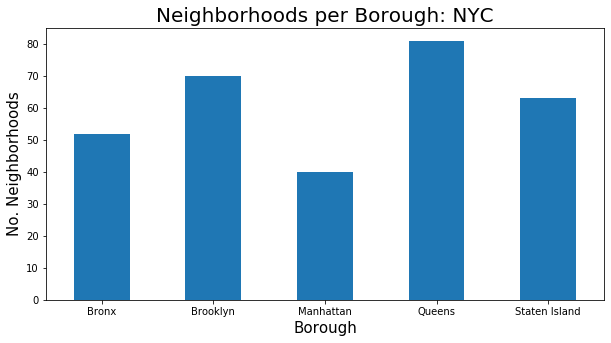

In [8]:
ny_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5))
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [9]:
# # queens has most neighborhoods
# # prepare neighborhood list that contains indian resturants
# column_names=['Borough', 'Neighborhood', 'ID','Name']
# chinese_rest_ny=pd.DataFrame(columns=column_names)
# count=1
# for row in ny_data.values.tolist():
#     Borough, Neighborhood, Latitude, Longitude=row
#     venues = get_venues(Latitude,Longitude)
#     try:
#         chinese_resturants=venues[venues['Category']=='Chinese Restaurant']   
#         print('(',count,'/',len(ny_data),')','Chinese Resturants in '+Neighborhood+', '+Borough+':'+str(len(chinese_resturants)))
#         print(row)
#         for resturant_detail in chinese_resturants.values.tolist():
#             id, name , category=resturant_detail
#             chinese_rest_ny = chinese_rest_ny.append({'Borough': Borough,
#                                                     'Neighborhood': Neighborhood, 
#                                                     'ID': id,
#                                                     'Name' : name
#                                                    }, ignore_index=True)
#         count+=1
#     except:
#         pass
# chinese_rest_ny.to_csv('chinese_rest_ny_tocsv1.csv') # Save the information so far to a .csv file due to limited calls on FourSquare
chinese_rest_ny = pd.read_csv('chinese_rest_ny_tocsv.csv',index_col=0)
chinese_rest_ny.tail()


Borough         Neighborhood                        ID  \
175  Staten Island         Prince's Bay  4bb7d282b35776b0b83dc801   
176          Bronx             Allerton  4c7dbf7f10916dcba78e2a96   
177          Bronx  Kingsbridge Heights  4d965fd061a3a1cde4989a42   
178          Bronx  Kingsbridge Heights  4c7851e03badb1f7137c4b54   
179       Brooklyn              Erasmus  4e10c87122713f7d7bcb9d1d   

                              Name  
175                   Island Taste  
176                      Chef King  
177  Lucky Star Chinese Restaurant  
178              Yu Hua Restaurant  
179           Kam Man Chinese Food

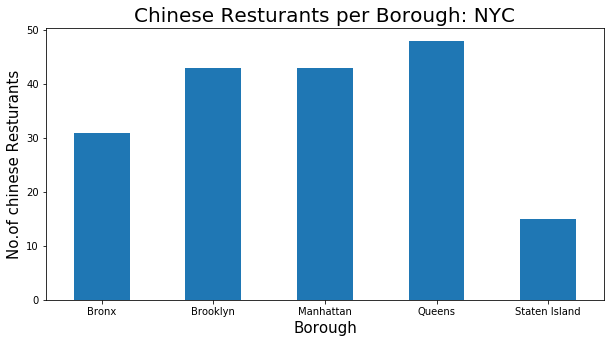

In [10]:
chinese_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5))
plt.title('Chinese Resturants per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No.of chinese Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

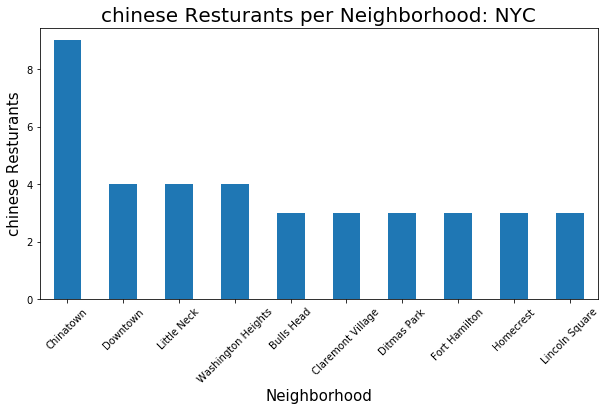

In [11]:
chinese_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(10).plot.bar(figsize=(10,5))
plt.title('chinese Resturants per Neighborhood: NYC', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('chinese Resturants', fontsize=15)
plt.xticks(rotation = 45)
plt.show()

In [12]:
chinese_rest_ny

Borough         Neighborhood                        ID  \
0            Bronx           Co-op City  4c9d5f2654c8a1cd2e71834b   
1            Bronx              Norwood  4e41d2c4b61ca5ba3b1f9c6b   
2            Bronx       Pelham Parkway  4b9d6b45f964a52078ab36e3   
3            Bronx         Bedford Park  4e4d0387bd413c4cc66dfd72   
4            Bronx              Fordham  4cf30a837e93f04d366a5669   
..             ...                  ...                       ...   
175  Staten Island         Prince's Bay  4bb7d282b35776b0b83dc801   
176          Bronx             Allerton  4c7dbf7f10916dcba78e2a96   
177          Bronx  Kingsbridge Heights  4d965fd061a3a1cde4989a42   
178          Bronx  Kingsbridge Heights  4c7851e03badb1f7137c4b54   
179       Brooklyn              Erasmus  4e10c87122713f7d7bcb9d1d   

                              Name  
0     Guang Hui Chinese Restaurant  
1               Ming Liang Kitchen  
2       Mr. Q's Chinese Restaurant  
3     Hung Hing Chinese Restaurant  
4                     China Wok II  
..                             ...  
175                   Island Taste  
176                      Chef King  
177  Lucky Star Chinese Restaurant  
178              Yu Hua Restaurant  
179           Kam Man Chinese Food  

[180 rows x 4 columns]

In [13]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
chinese_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in chinese_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(chinese_rest_ny),')','processed')
    chinese_rest_stats_ny = chinese_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
chinese_rest_stats_ny.tail()
chinese_rest_stats_ny.to_csv('chinese_rest_stats_ny_csv.csv') 

No data available for id= 4c9d5f2654c8a1cd2e71834b
( 1 / 180 ) processed
No data available for id= 4e41d2c4b61ca5ba3b1f9c6b
( 2 / 180 ) processed
No data available for id= 4b9d6b45f964a52078ab36e3
( 3 / 180 ) processed
No data available for id= 4e4d0387bd413c4cc66dfd72
( 4 / 180 ) processed
No data available for id= 4cf30a837e93f04d366a5669
( 5 / 180 ) processed
No data available for id= 4e484885ae60fa72330c9bbc
( 6 / 180 ) processed
No data available for id= 4da0c70b7aee5481bda6b2fe
( 7 / 180 ) processed
No data available for id= 4d2d1728762fa143051f7664
( 8 / 180 ) processed
No data available for id= 4c3a3eb9ae2da59369f303c6
( 9 / 180 ) processed
No data available for id= 4cfece683f846dcb83408d37
( 10 / 180 ) processed
No data available for id= 4cc63e36bde8f04dcbfeb54b
( 11 / 180 ) processed
No data available for id= 4e656e8252b1260c14683b4b
( 12 / 180 ) processed
No data available for id= 4b89b62df964a520ff4c32e3
( 13 / 180 ) processed
No data available for id= 4d7273065f0037048835e

In [14]:
chinese_rest_stats_ny

Borough         Neighborhood ID Name Likes Rating Tips
0            Bronx           Co-op City  0    0     0      0    0
1            Bronx              Norwood  0    0     0      0    0
2            Bronx       Pelham Parkway  0    0     0      0    0
3            Bronx         Bedford Park  0    0     0      0    0
4            Bronx              Fordham  0    0     0      0    0
..             ...                  ... ..  ...   ...    ...  ...
175  Staten Island         Prince's Bay  0    0     0      0    0
176          Bronx             Allerton  0    0     0      0    0
177          Bronx  Kingsbridge Heights  0    0     0      0    0
178          Bronx  Kingsbridge Heights  0    0     0      0    0
179       Brooklyn              Erasmus  0    0     0      0    0

[180 rows x 7 columns]

In [15]:
chinese_rest_stats_ny.shape

(180, 7)

In [16]:
chinese_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Borough       180 non-null    object
 1   Neighborhood  180 non-null    object
 2   ID            180 non-null    object
 3   Name          180 non-null    object
 4   Likes         180 non-null    object
 5   Rating        180 non-null    object
 6   Tips          180 non-null    object
dtypes: object(7)
memory usage: 10.0+ KB


In [17]:
chinese_rest_stats_ny['Likes']=chinese_rest_stats_ny['Likes'].astype('float64')
chinese_rest_stats_ny['Tips']=chinese_rest_stats_ny['Tips'].astype('float64')
chinese_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       180 non-null    object 
 1   Neighborhood  180 non-null    object 
 2   ID            180 non-null    object 
 3   Name          180 non-null    object 
 4   Likes         180 non-null    float64
 5   Rating        180 non-null    object 
 6   Tips          180 non-null    float64
dtypes: float64(2), object(5)
memory usage: 10.0+ KB


In [18]:
chinese_rest_stats_ny.describe()

Likes   Tips
count  180.0  180.0
mean     0.0    0.0
std      0.0    0.0
min      0.0    0.0
25%      0.0    0.0
50%      0.0    0.0
75%      0.0    0.0
max      0.0    0.0

In [19]:
chinese_rest_stats_ny.iloc[chinese_rest_stats_ny['Likes'].idxmax()]

Borough              Bronx
Neighborhood    Co-op City
ID                       0
Name                     0
Likes                    0
Rating                   0
Tips                     0
Name: 0, dtype: object

In [20]:
chinese_rest_stats_ny['Rating'] = chinese_rest_stats_ny['Rating'].astype(float)
chinese_rest_stats_ny.iloc[chinese_rest_stats_ny['Rating'].idxmax()]

Borough              Bronx
Neighborhood    Co-op City
ID                       0
Name                     0
Likes                    0
Rating                   0
Tips                     0
Name: 0, dtype: object

In [21]:
chinese_rest_stats_ny.iloc[chinese_rest_stats_ny['Tips'].idxmax()]

Borough              Bronx
Neighborhood    Co-op City
ID                       0
Name                     0
Likes                    0
Rating                   0
Tips                     0
Name: 0, dtype: object

In [22]:
ny_neighborhood_stats=chinese_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

Neighborhood  Average Rating
0          Allerton             0.0
74  North Riverdale             0.0
86  Queensboro Hill             0.0
85   Queens Village             0.0
84     Prince's Bay             0.0
83   Pelham Parkway             0.0
82   Pelham Gardens             0.0
81       Pelham Bay             0.0
80      Parkchester             0.0
79       Park Slope             0.0

In [23]:
ny_borough_stats=chinese_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()


Borough  Average Rating
0          Bronx             0.0
1       Brooklyn             0.0
2      Manhattan             0.0
3         Queens             0.0
4  Staten Island             0.0

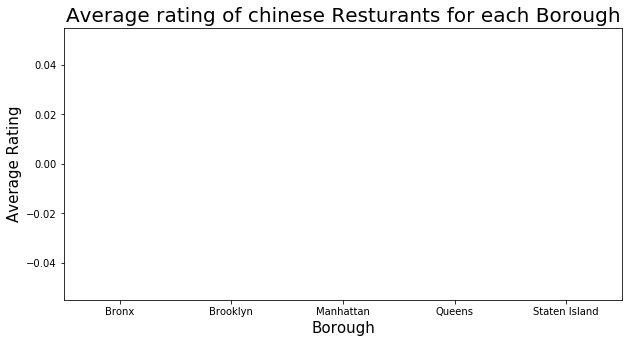

In [24]:
chinese_rest_stats_ny.groupby('Borough').mean()['Rating'].plot.bar(figsize=(10,5))
plt.title('Average rating of chinese Resturants for each Borough', fontsize=20)
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()


#### Final stats

In [25]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]
ny_neighborhood_stats

Empty DataFrame
Columns: [Neighborhood, Average Rating]
Index: []

In [26]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,ny_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats


Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude, Average Rating]
Index: []

#### Mapping results

In [27]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
ny_geo = 'Borough Boundaries.geojson'
ny_map.choropleth(
    geo_data=ny_geo,
    data=ny_borough_stats,
    columns=['Borough', 'Average Rating'],
    key_on='feature.properties.boro_name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Rating'
)
# display map
# as this is huge map data , we will save it to a file
ny_map.save('borough_rating.html')


In [28]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
ny_geo = r'Borough Boundaries.geojson'
ny_map.choropleth(
    geo_data=ny_geo,
    data=ny_borough_stats,
    columns=['Borough', 'Average Rating'],
    key_on='feature.properties.boro_name',
    fill_color='PuBu', #'YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Rating'
)
# display map
# as this is huge map data , we will save it to a file
ny_map.save('borough_rating.html')
